In [2]:
# Importamos algunas cosas necesarias
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit import Qubit
from qiskit import quantum_info
from qiskit.result import marginal_counts
from qiskit import IBMQ, Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex, plot_distribution
import numpy as np
import matplotlib.pyplot as plt

nada


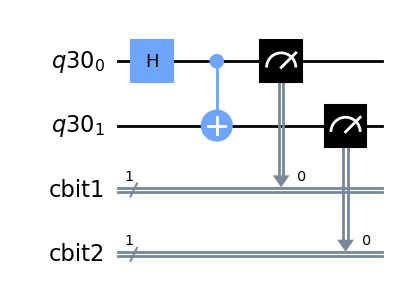

In [28]:
qubits = QuantumRegister(2)
cbit1 = ClassicalRegister(1, name="cbit1") 
cbit2 = ClassicalRegister(1, name="cbit2")
qc = QuantumCircuit(qubits, cbit1, cbit2)
def crear_estado_de_bell(circuito, qubits, bell):
    circuito.h(qubits[0])
    circuito.cx(qubits[0], qubits[1])
    match bell:
        case "01":
            circuito.x(qubits[1])
        case "10":
            circuito.z(qubits[1])
        case "11":
            circuito.x(qubits[0])
            circuito.z(qubits[1])
        case "00":
            print("nada")
            
crear_estado_de_bell(qc, qubits, "00")
qc.measure(qubits[0],cbit1)
qc.measure(qubits[1],cbit2)
qc.draw("mpl")

In [29]:
sim = Aer.get_backend("aer_simulator") 
output = execute(qc, sim)
counts = output.result().get_counts(qc)

In [30]:
qubit_counts = [marginal_counts(counts, [bit]) for bit in range(2)]

Text(0, 0.5, 'Probabilities')

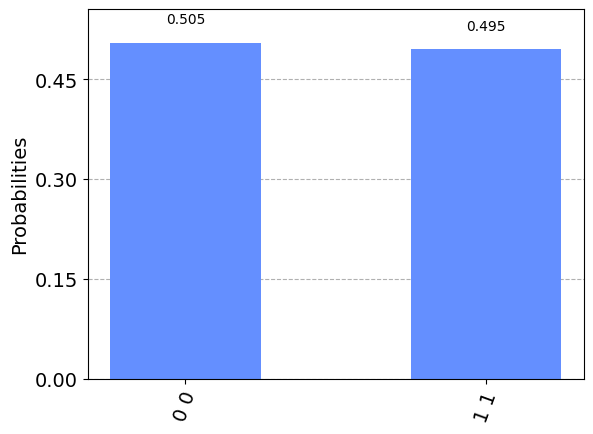

In [31]:
grafica = plt.subplot()
plot_distribution(counts, ax=grafica)
grafica.set_ylabel('Probabilities')